In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


%matplotlib inline

In [5]:
reg_data = pd.read_csv("final_players.csv")

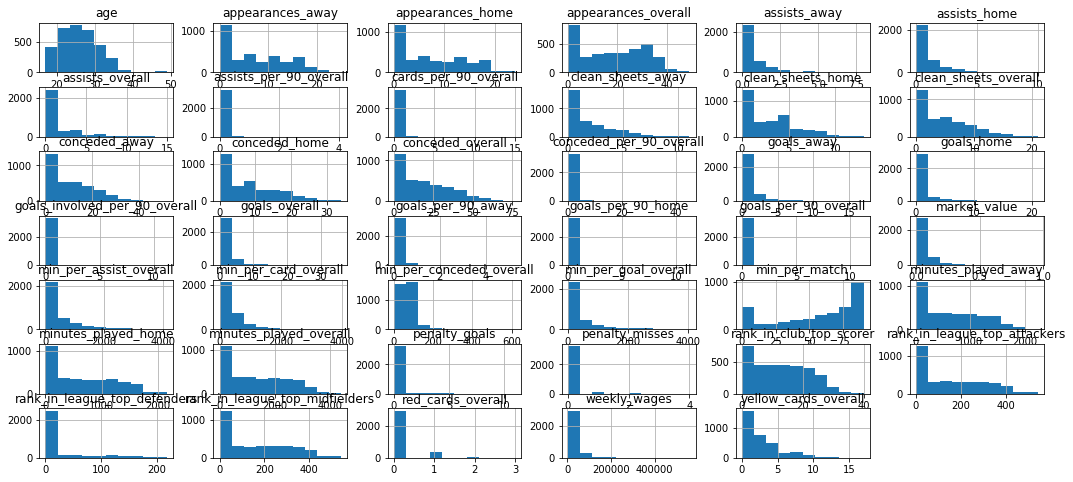

In [6]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
reg_data.hist(ax = ax);

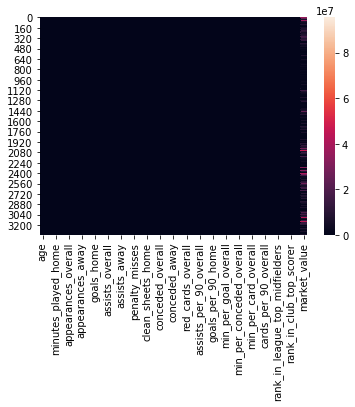

In [7]:

sns.heatmap(reg_data.drop(['full_name','nationality', 'league','position', 'season',
                          'current_club'],axis=1))

In [8]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 47 columns):
full_name                         3351 non-null object
age                               3351 non-null int64
league                            3351 non-null object
season                            3351 non-null object
position                          3351 non-null object
current_club                      3351 non-null object
minutes_played_overall            3351 non-null int64
minutes_played_home               3351 non-null int64
minutes_played_away               3351 non-null int64
nationality                       3351 non-null object
appearances_overall               3351 non-null int64
appearances_home                  3351 non-null int64
appearances_away                  3351 non-null int64
goals_overall                     3351 non-null int64
goals_home                        3351 non-null int64
goals_away                        3351 non-null int64
assists_overall        

From the dataset, we are interested in using positions of the players and the league the players in as categorical variables in the model

In [9]:
reg_data.head()

,full_name,age,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
0,De Gea,29,Premier League,2018/2019,Goalkeeper,Manchester United,3420,1710,1710,Spain,...,90,3420,0,0.03,310,419,90,18,200000,56000000
1,Matteo Darmian,30,Premier League,2018/2019,Defender,Manchester United,443,353,90,Italy,...,74,0,0,0.00,411,366,102,25,36000,5500000
2,Victor Nilsson Lindelöf,25,Premier League,2018/2019,Defender,Manchester United,2602,1112,1490,Sweden,...,87,2602,2602,0.03,263,249,88,14,97000,22000000
3,Luke Shaw,24,Premier League,2018/2019,Defender,Manchester United,2592,1170,1422,England,...,89,236,648,0.38,262,104,79,13,90000,16500000
4,Eric Bertrand Bailly,25,Premier League,2018/2019,Defender,Manchester United,637,349,288,Côte d'Ivoire,...,53,319,0,0.28,340,271,142,26,100000,16500000


In [10]:
reg_data.describe()

,age,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,weekly_wages,market_value
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,...,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3.351000e+03
mean,26.008057,1293.735601,647.791406,645.944196,18.049239,7.217547,7.193375,1.828409,1.024470,0.803939,...,56.696807,414.123545,451.153387,0.200084,155.285288,155.978215,25.477768,12.212474,28793.494479,6.622768e+06
std,4.797661,1105.185759,562.202322,552.153761,13.075931,6.427841,6.295905,3.519936,2.117729,1.667619,...,30.353253,548.273577,718.732533,0.566462,146.291350,147.342980,48.947349,8.784395,38186.701984,9.756777e+06
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,2.000000e+04
25%,22.000000,192.000000,90.000000,90.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6000.000000,9.250000e+05
50%,26.000000,1108.000000,546.000000,561.000000,18.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,66.000000,278.000000,0.000000,0.120000,129.000000,129.000000,0.000000,12.000000,18000.000000,3.200000e+06
75%,29.000000,2202.000000,1112.000000,1096.000000,30.000000,13.000000,12.000000,2.000000,1.000000,1.000000,...,83.000000,562.500000,662.500000,0.260000,275.000000,277.000000,24.000000,19.000000,37000.000000,8.500000e+06
max,49.000000,4392.000000,2160.000000,2232.000000,49.000000,24.000000,25.000000,36.000000,21.000000,17.000000,...,90.000000,3960.000000,4140.000000,15.000000,542.000000,542.000000,219.000000,40.000000,560000.000000,9.550000e+07


Plotting the scatter matrix of the dataset to get an idea on multicollinearity of the variables

### EFFECT OF LOG TRANSFORMATIONS ON STATSMODEL REGRESSION MODEL

One common solution to non-variable distributions is to try applying a logarithmic function and observe its impact on the distribution.

In [11]:
statsmodel_df = reg_data

In [12]:
outcome = 'weekly_wages'
predictors = ['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']

In [13]:
non_normal = ['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']
for feat in non_normal:
    statsmodel_df[feat] = statsmodel_df[feat].map(lambda x: np.log(x + 1))


In [14]:
pred = '+'.join(predictors)
formula = outcome + '~' + pred
model = ols(formula=formula, data=statsmodel_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weekly_wages   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     299.0
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          2.50e-307
Time:                        16:16:37   Log-Likelihood:                -39389.
No. Observations:                3351   AIC:                         7.879e+04
Df Residuals:                    3344   BIC:                         7.883e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.633e+05    1.2e+04    -21.986      0.000   -2.87e+05    -2.4e+05
age                     2.312e+04   3296.315      7.013      0.000    1.67e+04    2.96e+04
assists_overall         7242.8814    938.854      7.715      0.000    5402.095    9083.668
penalty_goals           9614.3845   2029.023      4.738      0.000    5636.132    1.36e+04
penalty_misses         -5890.0324   4049.677     -1.454      0.146   -1.38e+04    2050.063
minutes_played_overall -2543.1891    272.603     -9.329      0.000   -3077.676   -2008.703
market_value            1.528e+04    445.140     34.322      0.000    1.44e+04    1.62e+04
==============================================================================
Omnibus:                     2996.038   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155353.732
Skew:                           4.072   Prob(JB):                         0.00
Kurtosis:                      35.347   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This represents a better model than the one developed earlier without any pre-processing.
No signs of multicollinearity although the adjusted R-squared is less, we get a better more robust model which enables each feature in the model to be truly independent and each variable can be varied with others kept constant.

There is still a lot of skew and kurtosis in the distribution of the model results but this might be atrributed to the magnitude of each value not being on the same scale.More pre-processing is definitely needed.
The positive skewness indicates a long tail to the right and postive kurtosis value more than 3 points to having too great a peak

### BASELINE MODELLING

Next we are going to delve into recursive feature elimination with the sklearn

In [15]:
target = reg_data['weekly_wages'].values
predictors = reg_data[['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']]

In [16]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 6) #for the 6 selected continuous varaiables in the dataset
selector = selector.fit(predictors, target)

In [17]:
selector.support_

array([ True,  True,  True,  True,  True,  True])

In [18]:
selector.ranking_ # showing the ranking of the features

array([1, 1, 1, 1, 1, 1])

In [19]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_) # coefficient and intercept estimates

[23118.07339347  7242.88137288  9614.38453774 -5890.03236813
 -2543.18907604 15277.91706648]
-263342.90818025987


What the above feature ranking reveals is that all the features selected from the dataset have a ranking of one and all contribute the training of the model

### BASELINE LINEAR REGRESSION MODELLING

In [20]:
target = reg_data['weekly_wages']
predictors = reg_data[['age', 'assists_overall', 'penalty_goals', 'penalty_misses', 
               'minutes_played_overall','market_value']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state = 42, test_size = 0.30)

In [22]:
ss = StandardScaler()
X_train_scaled  = ss.fit_transform(X_train)

In [23]:
X_test_scaled = ss.transform(X_test)

In [24]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('Baseline model for Continuous variables')
print('Training r^2:', linreg.score(X_train_scaled, y_train))
print('Testing r^2:', linreg.score(X_test_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print('Testing MSE:', mean_squared_error(y_test, linreg.predict(X_test_scaled)))

Baseline model for Continuous variables
Training r^2: 0.34637469672947874
Testing r^2: 0.3541747542219965
Training MSE: 960436251.707198
Testing MSE: 922787531.5903548


The above model is underperforming but take into account we haven't added the categorical variables and the difference in MSE between training and the test is not a lot so the model points more towards underfitting than overfitting.

Applying log-transform before scaling the features but first things first we check for the normality of the distribution of the features

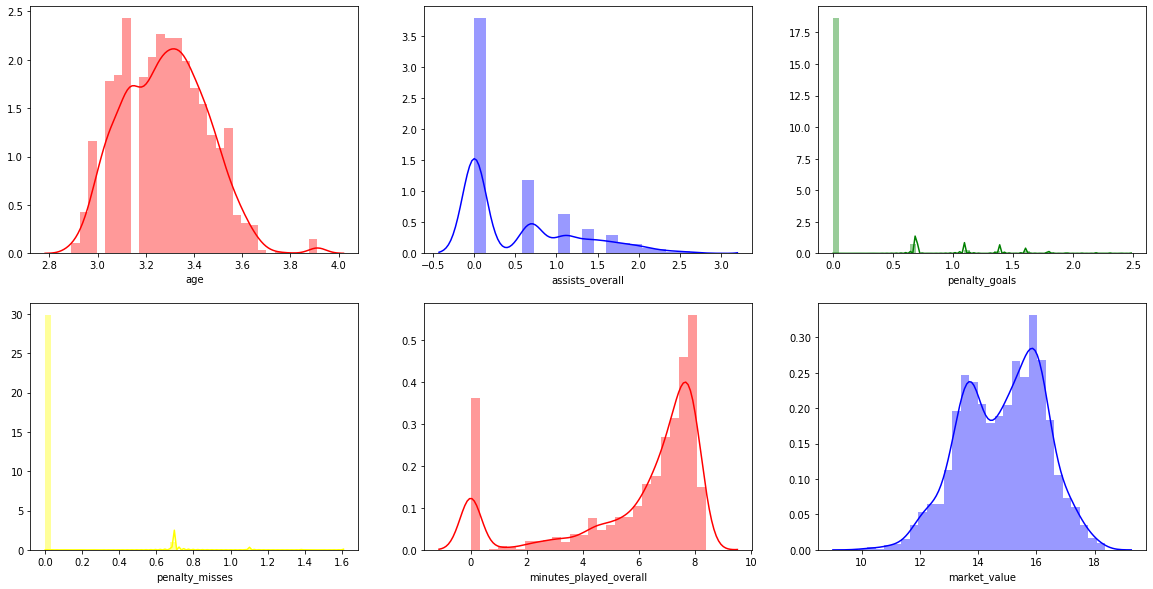

In [26]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

sns.distplot(reg_data['age'], color = 'red', ax = ax1)
sns.distplot(reg_data['assists_overall'], color = 'blue', ax = ax2)
sns.distplot(reg_data['penalty_goals'], color = 'green', ax = ax3)
sns.distplot(reg_data['penalty_misses'], color = 'yellow', ax = ax4)
sns.distplot(reg_data['minutes_played_overall'], color = 'red', ax = ax5)
sns.distplot(reg_data['market_value'], color = 'blue', ax = ax6)

Log transform the four features market value, assists overall and minutes played overall